# POC on binary classification with TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

/Users/joby/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [2]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step

In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [5]:
train_data.shape

(25000,)

In [8]:
type(train_data[0])

list

# Convert Integer to Word for reference

In [9]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

1646592/1641221 [==============================] - 0s 0us/step


In [16]:
reverse_word_index = dict([(value,key) for key, value in word_index.items()])

In [25]:
def decode_review(text):
    return ' '.join(reverse_word_index.get(i) for i in text)
    

In [26]:
print(decode_review(train_data[1]))

<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


# Data Preparation

In [28]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

In [30]:
print(len(train_data[0]),len(test_data[1]))
decode_review(train_data[0])

256 256


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# Build the Model

In [33]:
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
# Creating Validation data
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Train Model

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs= 40,
                    batch_size = 512,
                    validation_data=(x_val, y_val),
                    verbose=1
                    )

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 77us/step - loss: 0.6926 - acc: 0.5247 - val_loss: 0.6913 - val_acc: 0.5591
Epoch 2/40
15000/15000 [==============================] - 1s 41us/step - loss: 0.6896 - acc: 0.5707 - val_loss: 0.6885 - val_acc: 0.6049

In [41]:
results = model.evaluate(test_data,test_labels)
print(results)

25000/25000 [==============================] - 1s 20us/step - ETA: 0s
[0.3052408861351013, 0.87512]


In [54]:
np.argmax(model.predict(test_data[11]))

14

In [55]:
decode_review(test_data[11])

"<START> when i first saw this movie in the theater i was so angry it completely blew in my opinion i didn't see it for a decade then decided what the hell let's see i'm watching all <UNK> movies now to see where it went wrong my guess is it was with sequel 5 that was the first to <UNK> the whole i am in a dream <UNK> i see weird stuff oh <UNK> what is happening oh its a dream oh its not a dream oh wait i see something spooky oh never mind <UNK> storyline those sequels don't even require the box to be opened or stick to the rules from the first 4 movies that if you saw <UNK> you are pretty much screwed and dead the first 3 <UNK> to this storyline which made it so scary in the first place nothing fantasy nothing weird the box got opened boom they came was the only one that could bargain her way out of it first because of uncle frank then because she had information about the this movie at least attempts to stick to all that even though it was a bad story it was still somewhat <UNK> no i

In [56]:
test_labels[11]

0

In [59]:
model.predict(test_data[11]).shape

(256, 1)

In [60]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [64]:
type(history_dict['acc'])

list

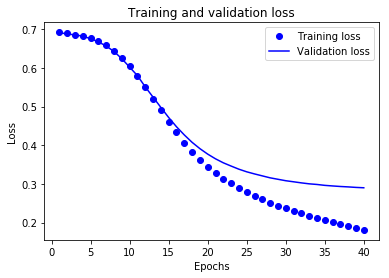

In [65]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

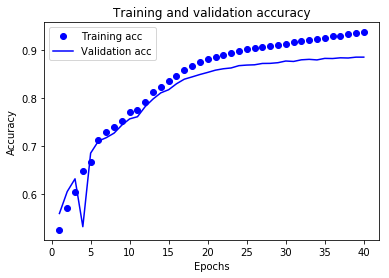

In [66]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()